In [78]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns

## HW2-1

In [79]:
mydat = pd.read_csv('./data.csv')

In [80]:
def hw2_1(data):
    c = data.columns
    lc = len(c)
    ld = len(data)
    L = np.zeros((lc,lc))
    for i in range(lc):
        for j in range(lc):
            I = c[i]
            J = c[j]
            
            X = data[I]
            Y = data[J]
            for k in range(ld):
                if np.isnan(X[k]) == 1 or np.isnan(Y[k]) == 1:
                    X = X.drop(k)
                    Y = Y.drop(k)
                    
            X = np.array(X)
            Y = np.array(Y)
            Xbar = np.mean(X) * np.ones(np.shape(X))
            Ybar = np.mean(Y) * np.ones(np.shape(Y)) 
            Numerator = np.transpose((X-Xbar))*(Y-Ybar)
            Numerator = np.sum(Numerator)
            
            Denominator1 = np.transpose(X-Xbar)*(X-Xbar)
            Denominator2 = np.transpose(Y-Ybar)*(Y-Ybar)
            Denominator = np.sqrt(np.sum(Denominator1) * np.sum(Denominator2))
            L[i,j] = Numerator/Denominator
        
    return pd.DataFrame(L, columns = c, index=c)

In [81]:
hw2_1(mydat[['gender','age','weight','height','income']])

,gender,age,weight,height,income
gender,1.000000,0.013108,0.898438,0.703123,0.016990
age,0.013108,1.000000,-0.050683,-0.012024,-0.016408
weight,0.898438,-0.050683,1.000000,0.772103,0.000982
height,0.703123,-0.012024,0.772103,1.000000,-0.005520
income,0.016990,-0.016408,0.000982,-0.005520,1.000000


## Test with existing function

In [82]:
mydat[['gender','age','weight','height','income']].corr()

,gender,age,weight,height,income
gender,1.000000,0.013108,0.898438,0.703123,0.016990
age,0.013108,1.000000,-0.050683,-0.012024,-0.016408
weight,0.898438,-0.050683,1.000000,0.772103,0.000982
height,0.703123,-0.012024,0.772103,1.000000,-0.005520
income,0.016990,-0.016408,0.000982,-0.005520,1.000000


We can check that the result from the constructed function is as same as that of result from preexisting function.

# HW2-3

In [83]:
Weight = mydat['weight']

Process of deleting missing rows

In [84]:
for i in range(len(Weight)):
    if np.isnan(Weight[i]):
        Weight = Weight.drop(i)

## HW2-3-(a)

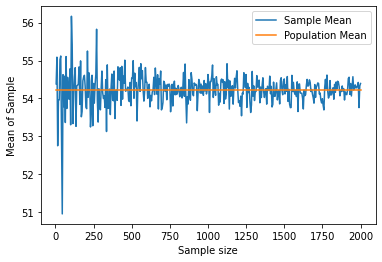

In [85]:
Mean = []
for i in range(400):
    Sample = np.random.choice(Weight,(i+1)*5)
    Mean.append(np.mean(Sample))

plt.plot(range(5,2005,5),Mean, label = 'Sample Mean')
plt.plot(range(5,2005,5), np.mean(Weight)*np.ones(400), label='Population Mean')
plt.xlabel('Sample size')
plt.ylabel('Mean of Sample')
plt.legend()
plt.show()
    

### Explanation

As the number of sample increases, sample mean approaches near the population mean.

## HW2-3-(b)

### Histogram of random sample of size 5

(array([ 2.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  2.,  3.,  4.,  1.,  3.,
         8.,  4.,  3.,  7.,  6.,  5., 11., 11.,  7.,  7., 12.,  5., 15.,
        16., 12., 19.,  7., 21., 19., 14., 20., 16., 17.,  7., 17., 18.,
        23., 16., 23., 22., 14., 27., 24., 18., 26., 18., 20., 22., 20.,
        18., 20.,  8., 23., 22., 16., 12., 21., 25., 15., 16., 16., 12.,
        21., 11., 12.,  6., 10.,  9., 13.,  8., 10.,  5.,  6.,  7.,  6.,
        10.,  4.,  6.,  6.,  4.,  3.,  4.,  3.,  2.,  4.,  1.,  0.,  2.,
         2.,  0.,  1.,  1.,  2.,  0.,  0.,  0.,  1.]),
 array([43.15459178, 43.38360063, 43.61260948, 43.84161833, 44.07062717,
        44.29963602, 44.52864487, 44.75765371, 44.98666256, 45.21567141,
        45.44468026, 45.6736891 , 45.90269795, 46.1317068 , 46.36071565,
        46.58972449, 46.81873334, 47.04774219, 47.27675104, 47.50575988,
        47.73476873, 47.96377758, 48.19278643, 48.42179527, 48.65080412,
        48.87981297, 49.10882182, 49.33783066, 49.56683951, 49.795848

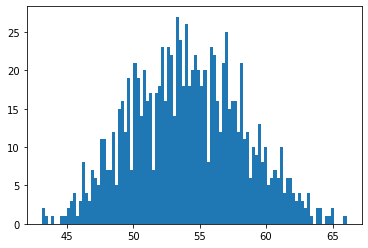

In [86]:
Mean5 = []
for i in range(1000):
    Sample = np.random.choice(Weight,5)
    Mean5.append(np.mean(Sample))
    
plt.hist(Mean5,bins=100)


### Histogram of random sample of size 10

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  2.,  3.,  4.,
         5.,  4.,  3.,  4.,  4.,  4.,  3.,  6.,  8., 10., 10.,  8., 13.,
        12., 13., 19., 13., 16., 15., 12., 16., 17., 15., 21., 19., 22.,
        22., 14., 28., 22., 24., 32., 24., 25., 21., 27., 20., 24., 23.,
        22., 25., 17., 21., 20., 23., 20., 18., 18., 14., 16., 13., 16.,
        16., 14., 16.,  8., 10., 11.,  9.,  4.,  7.,  9.,  3.,  4.,  5.,
         6.,  5.,  2.,  3.,  1.,  1.,  3.,  5.,  1.,  1.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([45.53956534, 45.72327986, 45.90699437, 46.09070888, 46.27442339,
        46.4581379 , 46.64185242, 46.82556693, 47.00928144, 47.19299595,
        47.37671047, 47.56042498, 47.74413949, 47.927854  , 48.11156852,
        48.29528303, 48.47899754, 48.66271205, 48.84642656, 49.03014108,
        49.21385559, 49.3975701 , 49.58128461, 49.76499913, 49.94871364,
        50.13242815, 50.31614266, 50.49985717, 50.68357169, 50.867286

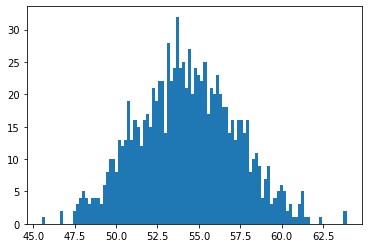

In [87]:
Mean10 = []
for i in range(1000):
    Sample = np.random.choice(Weight,10)
    Mean10.append(np.mean(Sample))
    
plt.hist(Mean10,bins=100)



### Histogram of random sample of size 100

(array([ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  2.,  1.,  0.,  1.,  1.,  3.,
         1.,  3.,  3.,  5.,  0.,  3.,  4.,  4.,  7.,  4., 10.,  5., 12.,
         6., 10., 10., 10.,  9., 11., 15., 21., 10., 19., 19., 18., 20.,
        16., 26., 13., 22.,  9., 20., 31., 25., 20., 20., 25., 19., 23.,
        29., 16., 19., 17., 24., 11., 24., 18., 24., 16., 20., 25., 15.,
        14., 17., 10., 17., 16., 16., 21.,  6.,  8.,  8., 10., 16.,  7.,
         2.,  5.,  7.,  6.,  6.,  4.,  5.,  2.,  2.,  1.,  4.,  1.,  2.,
         0.,  1.,  0.,  2.,  2.,  2.,  0.,  2.,  2.]),
 array([51.5882155 , 51.64021485, 51.69221421, 51.74421356, 51.79621291,
        51.84821226, 51.90021161, 51.95221097, 52.00421032, 52.05620967,
        52.10820902, 52.16020838, 52.21220773, 52.26420708, 52.31620643,
        52.36820579, 52.42020514, 52.47220449, 52.52420384, 52.57620319,
        52.62820255, 52.6802019 , 52.73220125, 52.7842006 , 52.83619996,
        52.88819931, 52.94019866, 52.99219801, 53.04419736, 53.096196

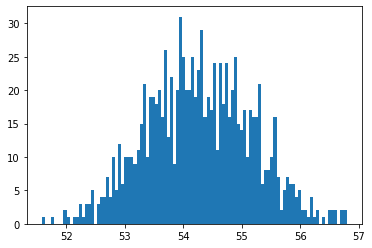

In [88]:
Mean100 = []
for i in range(1000):
    Sample = np.random.choice(Weight,100)
    Mean100.append(np.mean(Sample))
    
plt.hist(Mean100,bins=100)




### A histogram of the population

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  2.,  3.,  3.,  6.,
         2.,  4.,  8.,  5.,  8., 10., 15., 17., 18., 17., 25., 23., 18.,
        22., 28., 22., 27., 29., 24., 25., 16., 29., 20., 15., 18., 11.,
        15., 12., 10.,  7.,  5.,  4.,  8., 11.,  5.,  4.,  3.,  5.,  3.,
         8.,  9.,  9.,  7.,  8.,  9.,  7., 12., 12.,  8., 11., 10., 10.,
         6., 18.,  9., 15., 18., 14., 19., 17., 19., 17., 18., 10., 14.,
        13., 13., 12.,  8., 10., 12.,  5.,  7.,  6.,  7.,  5.,  4.,  3.,
         2.,  6.,  1.,  2.,  3.,  0.,  0.,  0.,  1.]),
 array([34.75236183, 35.15674082, 35.5611198 , 35.96549879, 36.36987778,
        36.77425676, 37.17863575, 37.58301474, 37.98739372, 38.39177271,
        38.7961517 , 39.20053069, 39.60490967, 40.00928866, 40.41366765,
        40.81804663, 41.22242562, 41.62680461, 42.03118359, 42.43556258,
        42.83994157, 43.24432056, 43.64869954, 44.05307853, 44.45745752,
        44.8618365 , 45.26621549, 45.67059448, 46.07497346, 46.479352

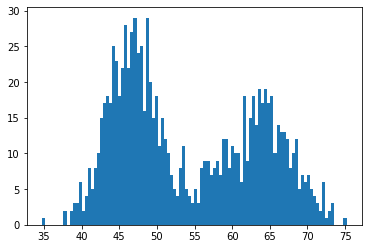

In [89]:
plt.hist(Weight,bins=100)

### Comparison between the graphs

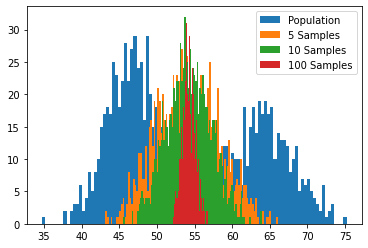

In [90]:
plt.hist(Weight,bins = 100, label = 'Population')
plt.hist(Mean5, bins = 100, label = '5 Samples')
plt.hist(Mean10, bins=100, label = '10 Samples')
plt.hist(Mean100,bins=100, label = '100 Samples')
plt.legend()
plt.show()

 We can see the difference between sample distribution and population distribution. Actually population distribution is not random since its data consists of weight of male and woman, whose distributions differ significantly(especially in terms of mean). So we can see the population distribution as placing distinct, independent random distributions in the same frame. So its distribution is like two bells standing by each other.
 
 
 But as we know, distribution made by adding two random variables from two distinct independent random variable is random. i.e.
 $ a_1X_1+a_2X_2\sim  N(a_1\mu_1+a_2\mu_2,a_1^2\sigma_1^2+a_2^2\sigma_2^2)$
 
 
So Sample distributions are bell-shaped.

### Box plot of random sample mean


In [91]:
L = np.zeros((len(Mean5)+len(Mean10)+len(Mean100),2))
for i in range(len(Mean5)):
    L[i,0] = Mean5[i]
    L[i,1] = 5
    
for i in range(len(Mean10)):
    L[i+len(Mean5),0] = Mean10[i]
    L[i+len(Mean5),1] = 10
    
for i in range(len(Mean100)):
    L[i+len(Mean5)+len(Mean10),0] = Mean100[i]
    L[i+len(Mean5)+len(Mean10),1] = 100



In [92]:
P = pd.DataFrame(L, columns=['Mean', 'Samples'])

<AxesSubplot:xlabel='Samples', ylabel='Mean'>

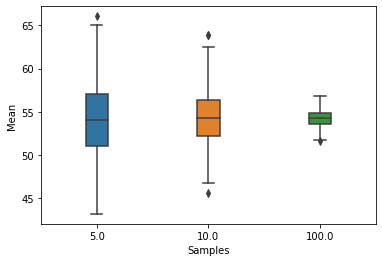

In [93]:
sns.boxplot(y = P['Mean'], x =P['Samples'] , width=0.2)

## HW2-3-(c)

I will use Two-sided test for the hypotehsis with significant level of $\alpha= 0.05$.

In [95]:
alpha = 0.05

So we need to check whether 55.2 is in the interval of significance level of $\alpha=0.05$.(Area excluding below $\alpha /2$ percentile and above $\alpha /2$ percentile.)

In [96]:
55.2<np.quantile(Mean10, 1-alpha/2) and 55.2>np.quantile(Mean10, alpha/2)

True

We should conclude that a random sample with its mean 55.2 is from the population.